In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 

## Descrição de Apoio

Objetivos

Os principais objetivos são:
1. Explore os dados - seja criativo e preste atenção aos detalhes. Você precisa fornecer à equipe de marketing uma melhor compreensão dos recursos característicos dos respondentes;
2. Propor e descrever uma segmentação de clientes com base nos comportamentos dos clientes;
3. Crie um modelo preditivo que permita à empresa maximizar o lucro da próxima campanha de marketing.
4. O que mais você achar necessário.

Entregas

1. Exploração de Dados;
2. Segmentação;
3. Modelo de Classificação;
4. Uma breve apresentação comercial.

A simplicidade e a conscientização do que está acontecendo são preferidas às implementações de algoritmos complexos que você não domina.

Marketing

> O objetivo da equipe é desenvolver um modelo que preveja o comportamento do cliente e aplicá-lo ao restante da base de clientes.
Esperamos que o modelo permita que a empresa escolha os clientes com maior probabilidade de comprar a oferta, deixando de fora os não respondentes, tornando a próxima campanha altamente lucrativa. Além disso, além de maximizar o lucro da campanha, o CMO está interessado em entender o estudo das características dos clientes dispostos a comprar o gadget.

Os dados

> O conjunto de dados contém recursos sociodemográficos e firmográficos de cerca de 2.240 clientes que
foram contatados. Além disso, ele contém um sinalizador para os clientes que responderam à campanha comprando o produto.

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.drop('ID', axis=1, inplace=True)

In [5]:
def EDA (df):
    eda_df = {}
    eda_df['Qtde_NaN'] = df.isnull().sum()
    eda_df['%_NaN'] = df.isnull().mean().round(2)
    eda_df['DType'] = df.dtypes
    eda_df['Qtde_Unicos'] = df.count()
    
    colunas = sorted(df.columns.tolist(), key=str.lower, reverse=False)
    eda_df['Qtde_Unicos'] = filtered_result = list(map(lambda x: len(df[x].unique().tolist()), colunas))
    
    eda_df['Media'] = df.mean().round(3)
    eda_df['Min'] = df.min()
    eda_df['Max'] = df.max()
    eda_df['STD'] = df.std().round(3)
    
    return pd.DataFrame(eda_df)

In [6]:
EDA(df)

,Qtde_NaN,%_NaN,DType,Qtde_Unicos,Media,Min,Max,STD
AcceptedCmp1,0,0.00,int64,2,0.064,0,1,0.245
AcceptedCmp2,0,0.00,int64,2,0.013,0,1,0.115
AcceptedCmp3,0,0.00,int64,2,0.073,0,1,0.260
AcceptedCmp4,0,0.00,int64,2,0.075,0,1,0.263
AcceptedCmp5,0,0.00,int64,2,0.073,0,1,0.260
Complain,0,0.00,int64,2,0.009,0,1,0.096
Dt_Customer,0,0.00,object,663,NaN,2012-07-30,2014-06-29,NaN
Education,0,0.00,object,5,NaN,2n Cycle,PhD,NaN
Income,24,0.01,float64,1975,52247.251,1730,666666,25173.077
Kidhome,0,0.00,int64,3,0.444,0,2,0.538


In [7]:
df.Marital_Status.groupby(df.Marital_Status).count()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64

In [8]:
df.Marital_Status.loc[df.Marital_Status == 'Absurd'] = 'Single'
df.Marital_Status.loc[df.Marital_Status == 'Alone'] = 'Single'
df.Marital_Status.loc[df.Marital_Status == 'YOLO'] = 'Single'
df.Marital_Status.loc[df.Marital_Status == 'Together'] = 'Married'

C:\Users\andre.oliveira\AppData\Local\Continuum\anaconda3\envs\aula_dh\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
df.Marital_Status.groupby(df.Marital_Status).count()

Marital_Status
Divorced     232
Married     1444
Single       487
Widow         77
Name: Marital_Status, dtype: int64

In [10]:
df.Income.loc[df.Income == 666666.000000] = df.Income.loc[df.Income != 666666.000000].mean() #Retirei o unico que estava com valor de 666666 na renda 

In [11]:
df.Income.loc[df.Income.isnull()] = df.Income.mean() #Retirando os nulos e substituindo pela média

In [12]:
df.Year_Birth.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [13]:
df = df[df.Year_Birth>1940] # retirando os 3 casos que fogem da idade aceitavem comparando com o 25% da fatia de ano de nascimento

In [14]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer) #transformando para data

In [15]:
pd.get_dummies(df.Education)

,2n Cycle,Basic,Graduation,Master,PhD
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2235,0,0,1,0,0
2236,0,0,0,0,1
2237,0,0,1,0,0
2238,0,0,0,1,0


In [16]:
pd.get_dummies(df.Marital_Status)

,Divorced,Married,Single,Widow
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
2235,0,1,0,0
2236,0,1,0,0
2237,1,0,0,0
2238,0,1,0,0


In [17]:
df_1 = pd.concat([df, pd.get_dummies(df.Education),pd.get_dummies(df.Marital_Status)], axis=1)

In [18]:
df_1.drop(['Education','Marital_Status'], axis=1, inplace=True)

In [19]:
df_knn = df_1.drop(['AcceptedCmp1','AcceptedCmp1','AcceptedCmp1','AcceptedCmp1','AcceptedCmp1','Dt_Customer'], axis=1)

In [20]:
scaler = StandardScaler()  
df_knn_norm = scaler.fit_transform(df_knn)

1 69315.99999999985
2 57793.332782935344
3 54169.995210384484
4 51709.45830770385
5 49679.94150046263
6 47834.80719184773
7 45608.99183099255
8 44188.9808739521
9 43312.764411180135
10 41807.13686269929
11 40237.146461264165
12 40236.60379284976
13 38291.64202893356
14 38469.07041222295
15 37139.217393417595
16 35691.45961198332
17 35433.48458240844
18 34457.34633806721
19 33710.768760070365
20 32714.332380860902
21 32659.58201310336
22 31609.90559367297
23 31451.933550622685
24 30600.207571410578
25 30030.196975654453
26 29760.87614867935
27 29550.155622073285
28 29133.87478467261
29 28934.526239295796
30 28933.436576748918
31 28090.346115787976
32 28150.558193370623
33 27955.86661252863
34 27794.146968082423
35 27344.710697011313
36 27071.03972147979
37 27208.989146755568
38 26890.59548068288
39 26828.095462910285
40 26428.94560163083
41 26270.094380383125
42 25870.19266391182
43 25931.170894755058
44 25632.565677834427
45 25417.208505455077
46 25418.138263822213
47 25198.46933560287

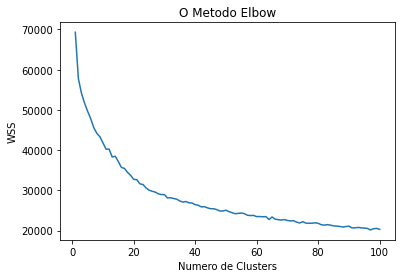

In [21]:
X = np.array(df_knn_norm)
wcss = []
 
for i in range(1, 101):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
    
plt.plot(range(1, 101), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

1 69315.99999999985
2 57793.332782935344
3 54170.0235065361
4 51754.37435172323
5 49430.71910787039
6 48068.559030014796
7 46838.97310655937
8 45619.979191394705
9 43961.83080256445
10 41977.30836311338
11 40594.31285703723
12 40186.9217660814
13 39107.73516490338
14 38359.379410450005
15 35597.10255182787
16 36334.70351338354
17 34942.52242654704
18 34851.28244541434
19 33222.03359619908
20 33791.91198510539


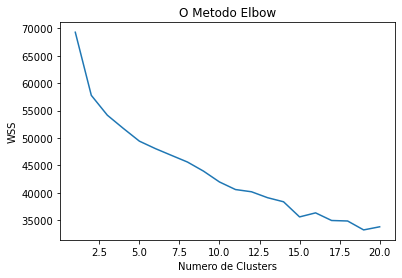

In [22]:
X = np.array(df_knn_norm)
wcss = []
 
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(X)
    print(i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)  
    
plt.plot(range(1, 21), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') #within cluster sum of squares
plt.show()

#Divisão em 17 grupos de compra

In [23]:
n_clusters = 17
#Inicializando o KMeans
kmeans = KMeans(n_clusters)
#Fit nos dados
kmeans = kmeans.fit(X)
#predizendo os clusters
labels = kmeans.predict(X)
#Encontrando os centroides
C = kmeans.cluster_centers_

In [24]:
kmeans.cluster_centers_.shape

(17, 33)

In [25]:
X_reduzido = TSNE(n_components=2).fit_transform(X)
X_reduzido.shape

(2236, 2)

In [26]:
n_clusters = 17
#Inicializando o KMeans
kmeans = KMeans(n_clusters)
#Fit nos dados
kmeans = kmeans.fit(X_reduzido)
#predizendo os clusters
labels = kmeans.predict(X_reduzido)
#Encontrando os centroides
C = kmeans.cluster_centers_

In [27]:
kmeans.cluster_centers_

array([[ 26.705578 , -33.908443 ],
       [-21.854364 ,   9.716658 ],
       [ 47.681477 ,  13.8671055],
       [-43.77727  , -45.054996 ],
       [  0.9877239,  50.906387 ],
       [  5.745738 ,  14.075134 ],
       [-25.564425 , -25.973831 ],
       [-53.608406 ,   1.1343285],
       [ 26.034145 ,   2.298551 ],
       [-11.621395 , -60.34597  ],
       [ 12.872958 , -13.066453 ],
       [  1.7217042, -34.8208   ],
       [ 32.539173 ,  57.177166 ],
       [ 39.95246  , -18.843264 ],
       [-22.460846 ,  34.89975  ],
       [ 14.64882  , -50.108894 ],
       [-11.61092  ,  -8.909191 ]], dtype=float32)

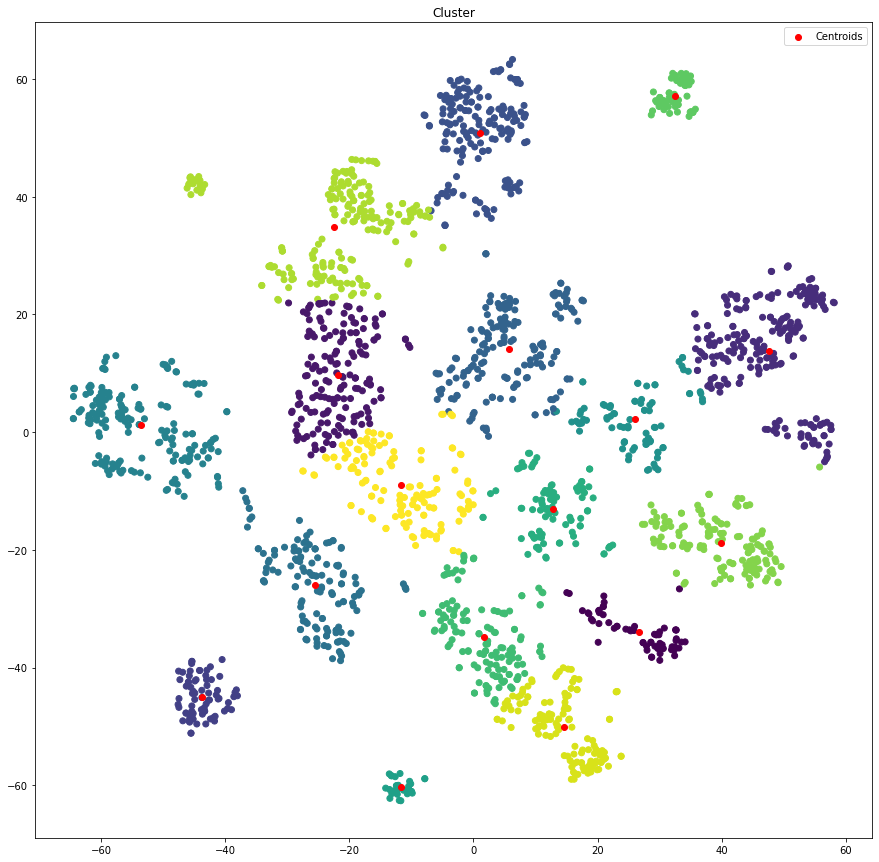

In [28]:
plt.figure(figsize=(15,15))

plt.scatter(X_reduzido[:, 0], X_reduzido[:, 1], s=plt.rcParams['lines.markersize']**2, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],  c = 'red',label = 'Centroids')
plt.title('Cluster')
plt.legend()

plt.show()

In [29]:
cluster_list = kmeans.labels_
df['Knn_Agroup'] = cluster_list

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2236 non-null   int64         
 1   Education            2236 non-null   object        
 2   Marital_Status       2236 non-null   object        
 3   Income               2236 non-null   float64       
 4   Kidhome              2236 non-null   int64         
 5   Teenhome             2236 non-null   int64         
 6   Dt_Customer          2236 non-null   datetime64[ns]
 7   Recency              2236 non-null   int64         
 8   MntWines             2236 non-null   int64         
 9   MntFruits            2236 non-null   int64         
 10  MntMeatProducts      2236 non-null   int64         
 11  MntFishProducts      2236 non-null   int64         
 12  MntSweetProducts     2236 non-null   int64         
 13  MntGoldProds         2236 non-nul

In [31]:
df['Buy_Activity'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [32]:
df['Visit_Activity'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']

In [33]:
pd.concat([df['Buy_Activity'],df['Visit_Activity']], axis=1).describe()

,Buy_Activity,Visit_Activity
count,2236.000000,2236.000000
mean,605.944097,20.192755
std,601.900217,7.290947
min,5.000000,0.000000
25%,69.000000,14.000000
50%,396.500000,19.000000
75%,1045.500000,25.000000
max,2525.000000,46.000000


In [34]:
df_best_public = df[(df.Buy_Activity >= 396.500000) & (df.Visit_Activity >= 19.000000)]

In [35]:
df_best_public.Knn_Agroup.value_counts()
#escolhidos grupos 0, 8, 12, 14, 16

1     155
6     125
11    120
16    112
5      69
2      67
10     67
7      66
13     39
3      39
8      32
14     30
9      25
0      23
15     19
4      19
12      2
Name: Knn_Agroup, dtype: int64

In [36]:
escolhidos = [0,8,12,14,16]
df_best_public_2 = df_best_public[(df_best_public.Knn_Agroup == 0) | (df_best_public.Knn_Agroup == 8) | (df_best_public.Knn_Agroup == 12) | (df_best_public.Knn_Agroup == 14) | (df_best_public.Knn_Agroup == 16)]

In [37]:
df_best_public_2.groupby(df_best_public_2.Knn_Agroup).all()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Buy_Activity,Visit_Activity
Knn_Agroup,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,True,False,False,True,True,True,False,...,False,False,False,False,False,True,True,False,True,True
8,True,True,True,True,False,False,True,True,True,False,...,False,False,False,False,False,True,True,False,True,True
12,True,True,True,True,False,False,True,True,True,True,...,False,False,False,False,False,True,True,False,True,True
14,True,True,True,True,False,False,True,True,True,False,...,False,False,False,False,False,True,True,False,True,True
16,True,True,True,True,False,False,True,False,True,False,...,False,False,False,False,False,True,True,False,True,True


Proximos passos:

> Analisar os dados do dataframe 'df_best_public_2' e focar em publico similar.

> Para clientes da base e aumento de vendas aplicaria o metodo de MBA para ofertar produtos similares as pessos que fazem parte do mesmo grupo de compra.

>>Link da metodologia MBA aplicada no python: https://pbpython.com/market-basket-analysis.html